<a href="https://colab.research.google.com/github/SauKno/Final_Project_Sales_Projection/blob/Trial/Classification_Cmp_Cohort.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [257]:
#importing all the required libraries
import pandas as pd
import numpy as np
import os

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn import preprocessing

pd.set_option('max_columns', 50)

np.random.seed(42)
from datetime import date, datetime, timedelta
%matplotlib inline

In [300]:
ifood_db = pd.read_csv('/content/customer_data.csv')
ifood_db.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,9/4/12,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,3/8/14,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,8/21/13,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2/10/14,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,1/19/14,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [301]:
ifood_db.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

In [302]:
#Add column to account for those who have responded to the campaign]
ifood_db['Reponded_to_Campaign']=ifood_db['AcceptedCmp1']+ifood_db['AcceptedCmp2']+ifood_db['AcceptedCmp3']+ifood_db['AcceptedCmp4']+ifood_db['AcceptedCmp5']+ifood_db['Response']

In [303]:
# Convert birth year to age
ifood_db['Age'] = date.today().year - ifood_db['Year_Birth']
ifood_db 


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Reponded_to_Campaign,Age
0,5524,1957,Graduation,Single,58138.0,0,0,9/4/12,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,1,65
1,2174,1954,Graduation,Single,46344.0,1,1,3/8/14,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,0,68
2,4141,1965,Graduation,Together,71613.0,0,0,8/21/13,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,0,57
3,6182,1984,Graduation,Together,26646.0,1,0,2/10/14,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,0,38
4,5324,1981,PhD,Married,58293.0,1,0,1/19/14,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,0,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,6/13/13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0,0,55
2236,4001,1946,PhD,Together,64014.0,2,1,6/10/14,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0,1,76
2237,7270,1981,Graduation,Divorced,56981.0,0,0,1/25/14,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0,1,41
2238,8235,1956,Master,Together,69245.0,0,1,1/24/14,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0,0,66


In [304]:
ifood_db = ifood_db.drop(columns=['Year_Birth'])

In [305]:
#Find marital status listed
np.unique(ifood_db['Marital_Status'], return_counts=True)


(array(['Absurd', 'Alone', 'Divorced', 'Married', 'Single', 'Together',
        'Widow', 'YOLO'], dtype=object),
 array([  2,   3, 232, 864, 480, 580,  77,   2]))

In [306]:
#Replace Marital Status with numbers (Single=Alone, Absurd, YOLO, )
ifood_db.loc[ifood_db['Marital_Status'].isin(['Alone','Absurd','YOLO']), 'Marital_Status']  = 'Single'
ifood_db.head(5)

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Reponded_to_Campaign,Age
0,5524,Graduation,Single,58138.0,0,0,9/4/12,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,1,65
1,2174,Graduation,Single,46344.0,1,1,3/8/14,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,0,68
2,4141,Graduation,Together,71613.0,0,0,8/21/13,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,0,57
3,6182,Graduation,Together,26646.0,1,0,2/10/14,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,0,38
4,5324,PhD,Married,58293.0,1,0,1/19/14,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,0,41


In [307]:
#Check that the code worked
np.unique(ifood_db['Marital_Status'], return_counts=True)

(array(['Divorced', 'Married', 'Single', 'Together', 'Widow'], dtype=object),
 array([232, 864, 487, 580,  77]))

In [308]:
# Change characters to numbers (Divorced=1, Married=2, Single=3, Together=4, Widow=5)
ifood_db["Marital_Status"].replace({"Divorced":"1", "Married":"2", "Single":"3", "Together":"4", "Widow":"5"}, inplace=True)

In [309]:
#Check the values under education
np.unique(ifood_db['Education'], return_counts=True)

(array(['2n Cycle', 'Basic', 'Graduation', 'Master', 'PhD'], dtype=object),
 array([ 203,   54, 1127,  370,  486]))

In [312]:
# Replace Educational to a number ("2n cycle":"0","Basic":"1","Graduation":"2","Master":"3","PhD":"4")
ifood_db["Education"].replace({"2n Cycle":"0", "Basic":"1", "Graduation":"2", "Master":"3", "PhD":"4"}, inplace=True)

In [313]:
np.unique(ifood_db['Education'], return_counts=True)

(array(['0', '1', '2', '3', '4'], dtype=object),
 array([ 203,   54, 1127,  370,  486]))

In [314]:
#Get the age of membership from Dt_Customer
ifood_db['Dt_Customer'] = pd.to_datetime(ifood_db['Dt_Customer'])
ifood_db.head(5)

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Reponded_to_Campaign,Age
0,5524,2,3,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,1,65
1,2174,2,3,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,0,68
2,4141,2,4,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,0,57
3,6182,2,4,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,0,38
4,5324,4,2,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,0,41


In [315]:
#Convert the column Dt_Customer to the years the memberhsip has been held
now = pd.Timestamp('now')
ifood_db['Dt_Customer'] = pd.to_datetime(ifood_db['Dt_Customer'], format='%y-%m-%d')    # 1
ifood_db['Dt_Customer'] = ifood_db['Dt_Customer'].where(ifood_db['Dt_Customer'] < now, ifood_db['Dt_Customer'] - np.timedelta64(100, 'Y'))   # 2
ifood_db['Dt_Customer'] = (now - ifood_db['Dt_Customer']).astype('<m8[Y]')    # 3
ifood_db.head(5)

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Reponded_to_Campaign,Age
0,5524,2,3,58138.0,0,0,9.0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,1,65
1,2174,2,3,46344.0,1,1,8.0,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,0,68
2,4141,2,4,71613.0,0,0,8.0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,0,57
3,6182,2,4,26646.0,1,0,8.0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,0,38
4,5324,4,2,58293.0,1,0,8.0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,0,41


In [316]:
#Drop irrelevant columns
ifood_db = ifood_db.drop(columns=['ID', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds','NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth','Complain', 'Z_CostContact', 'Z_Revenue', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response'])

In [317]:
ifood_db.head(5)

,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Reponded_to_Campaign,Age
0,2,3,58138.0,0,0,9.0,58,1,65
1,2,3,46344.0,1,1,8.0,38,0,68
2,2,4,71613.0,0,0,8.0,26,0,57
3,2,4,26646.0,1,0,8.0,26,0,38
4,4,2,58293.0,1,0,8.0,94,0,41


In [318]:
ifood_db.dtypes

Education                object
Marital_Status           object
Income                  float64
Kidhome                   int64
Teenhome                  int64
Dt_Customer             float64
Recency                   int64
Reponded_to_Campaign      int64
Age                       int64
dtype: object

In [323]:
#Convert Objects to numeric values
ifood_db['Education'].astype(str).astype(int)

0       2
1       2
2       2
3       2
4       4
       ..
2235    2
2236    4
2237    2
2238    3
2239    4
Name: Education, Length: 2240, dtype: int64

In [327]:
ifood_db['Education']=pd.to_numeric(ifood_db['Education'])

In [328]:
ifood_db['Marital_Status']=pd.to_numeric(ifood_db['Marital_Status'])

In [329]:
ifood_db.dtypes

Education                 int64
Marital_Status            int64
Income                  float64
Kidhome                   int64
Teenhome                  int64
Dt_Customer             float64
Recency                   int64
Reponded_to_Campaign      int64
Age                       int64
dtype: object

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1736069bd0>,
      dtype=object)

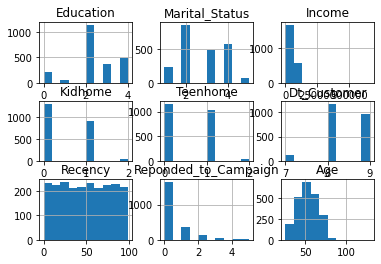

In [337]:
#Histogram for each column to look for patterns
#Histogram:
ifood_db.hist()

In [ ]:
# Create a dataframe for each campaign

In [207]:
#Drop irrelevant columns to determining demographic of those who responded to campaign 1
ifood_db_cmp1 = ifood_db.drop(columns=['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds','NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth','Complain', 'Z_CostContact', 'Z_Revenue', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response'])

In [175]:
#Drop any row that has a zero for AcceptedCmp1 so the data is only of those responded to campaign
ifood_db_cmp1 = ifood_db_cmp1[ifood_db_cmp1.AcceptedCmp1 != 0]
# Get a description of the data in that column
ifood_db_cmp1.describe()

,ID,Income,Kidhome,Teenhome,Dt_Customer,Recency,AcceptedCmp1,Age
count,144.000000,142.000000,144.000000,144.000000,144.000000,144.000000,144.0,144.000000
mean,5324.493056,78872.626761,0.090278,0.215278,8.277778,46.979167,1.0,53.465278
std,3078.326355,11337.015726,0.332677,0.445069,0.619547,28.380647,0.0,13.530547
min,146.000000,37929.000000,0.000000,0.000000,7.000000,1.000000,1.0,28.000000
25%,2793.750000,73065.000000,0.000000,0.000000,8.000000,25.000000,1.0,43.000000
50%,4901.500000,79967.000000,0.000000,0.000000,8.000000,45.500000,1.0,52.500000
75%,7896.750000,85663.750000,0.000000,0.000000,9.000000,71.250000,1.0,65.000000
max,10965.000000,105471.000000,2.000000,2.000000,9.000000,99.000000,1.0,78.000000


In [176]:
ifood_db_cmp2 = ifood_db.drop(columns=['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds','NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth','Complain', 'Z_CostContact', 'Z_Revenue', 'AcceptedCmp1', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response'])

In [177]:
#Drop any row that has a zero for AcceptedCmp2 so the data is only of those responded to campaign
ifood_db_cmp2 = ifood_db_cmp2[ifood_db_cmp2.AcceptedCmp2 != 0]
ifood_db_cmp2.describe()

,ID,Income,Kidhome,Teenhome,Dt_Customer,Recency,AcceptedCmp2,Age
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.0,30.000000
mean,5172.566667,71054.833333,0.066667,0.433333,8.366667,48.666667,1.0,53.866667
std,3397.449344,16069.844237,0.253708,0.568321,0.614948,31.607870,0.0,11.091262
min,1.000000,46015.000000,0.000000,0.000000,7.000000,0.000000,1.0,28.000000
25%,2930.750000,56673.250000,0.000000,0.000000,8.000000,25.000000,1.0,48.500000
50%,3622.500000,70896.500000,0.000000,0.000000,8.000000,52.500000,1.0,53.500000
75%,9273.250000,84895.750000,0.000000,1.000000,9.000000,74.750000,1.0,63.000000
max,10872.000000,102692.000000,1.000000,2.000000,9.000000,98.000000,1.0,70.000000


In [178]:
ifood_db_cmp3 = ifood_db.drop(columns=['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds','NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth','Complain', 'Z_CostContact', 'Z_Revenue', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp4', 'AcceptedCmp5', 'Response'])

In [179]:
#Drop any row that has a zero for AcceptedCmp3 so the data is only of those responded to campaign
ifood_db_cmp3 = ifood_db_cmp3[ifood_db_cmp3.AcceptedCmp3 != 0]
ifood_db_cmp3.describe()

,ID,Income,Kidhome,Teenhome,Dt_Customer,Recency,AcceptedCmp3,Age
count,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.0,163.000000
mean,5174.570552,50802.582822,0.472393,0.423313,8.349693,45.699387,1.0,50.552147
std,3215.652508,22012.662135,0.512954,0.543147,0.623943,28.511452,0.0,12.040648
min,158.000000,5648.000000,0.000000,0.000000,7.000000,0.000000,1.0,26.000000
25%,2422.500000,34626.000000,0.000000,0.000000,8.000000,24.000000,1.0,41.000000
50%,5107.000000,46998.000000,0.000000,0.000000,8.000000,39.000000,1.0,49.000000
75%,7784.000000,71778.000000,1.000000,1.000000,9.000000,70.000000,1.0,58.000000
max,11030.000000,96547.000000,2.000000,2.000000,9.000000,97.000000,1.0,79.000000


In [180]:
ifood_db_cmp4 = ifood_db.drop(columns=['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds','NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth','Complain', 'Z_CostContact', 'Z_Revenue', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp5', 'Response'])

In [181]:
#Drop any row that has a zero for AcceptedCmp4 so the data is only of those responded to campaign
ifood_db_cmp4 = ifood_db_cmp4[ifood_db_cmp4.AcceptedCmp4 != 0]
ifood_db_cmp4.describe()

,ID,Income,Kidhome,Teenhome,Dt_Customer,Recency,AcceptedCmp4,Age
count,167.000000,164.000000,167.000000,167.000000,167.000000,167.000000,167.0,167.000000
mean,5301.832335,68663.231707,0.137725,0.580838,8.383234,51.029940,1.0,55.748503
std,3154.516224,15478.927429,0.345647,0.563224,0.598558,29.079125,0.0,11.495268
min,48.000000,32144.000000,0.000000,0.000000,7.000000,1.000000,1.0,28.000000
25%,2620.000000,57103.000000,0.000000,0.000000,8.000000,24.500000,1.0,48.000000
50%,5186.000000,67375.000000,0.000000,1.000000,8.000000,55.000000,1.0,55.000000
75%,7954.500000,80508.000000,0.000000,1.000000,9.000000,73.500000,1.0,65.000000
max,10972.000000,102692.000000,1.000000,2.000000,9.000000,99.000000,1.0,78.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f173cd449d0>,
      dtype=object)

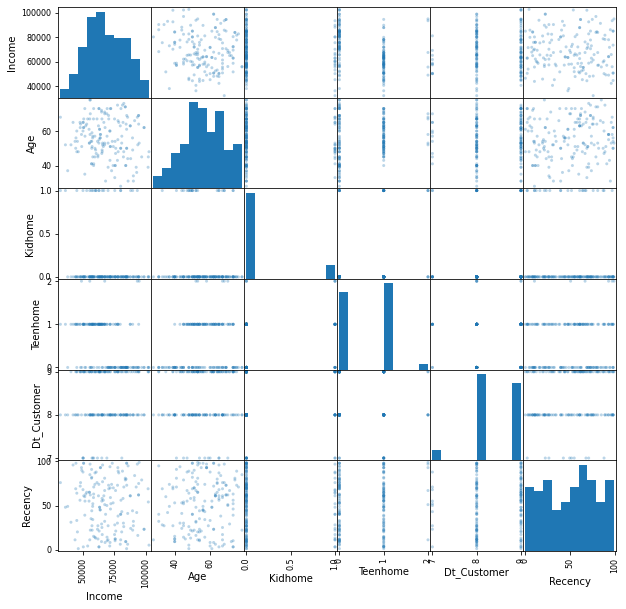

In [187]:
from pandas.plotting import scatter_matrix
scatter_matrix(ifood_db_cmp4[['Income', 'Age','Kidhome', 'Teenhome', 'Dt_Customer', 'Recency']],
    alpha=0.3, figsize=(10,10))


In [182]:
ifood_db_cmp5 = ifood_db.drop(columns=['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds','NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth','Complain', 'Z_CostContact', 'Z_Revenue', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'Response'])

In [183]:
#Drop any row that has a zero for AcceptedCmp4 so the data is only of those responded to campaign
ifood_db_cmp5 = ifood_db_cmp5[ifood_db_cmp5.AcceptedCmp5 != 0]
ifood_db_cmp5.describe()

,ID,Income,Kidhome,Teenhome,Dt_Customer,Recency,AcceptedCmp5,Age
count,163.000000,162.000000,163.00000,163.000000,163.000000,163.000000,163.0,163.000000
mean,5505.061350,82352.827160,0.04908,0.134969,8.398773,49.122699,1.0,52.889571
std,3099.336816,8773.677897,0.21670,0.393078,0.550419,29.242657,0.0,14.970756
min,175.000000,51563.000000,0.00000,0.000000,7.000000,1.000000,1.0,27.000000
25%,3009.500000,77472.750000,0.00000,0.000000,8.000000,23.000000,1.0,40.000000
50%,5341.000000,82462.000000,0.00000,0.000000,8.000000,53.000000,1.0,51.000000
75%,7961.000000,88015.500000,0.00000,0.000000,9.000000,74.500000,1.0,65.000000
max,11101.000000,105471.000000,1.00000,2.000000,9.000000,99.000000,1.0,123.000000


In [184]:
ifood_db_cmp6 = ifood_db.drop(columns=['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds','NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth','Complain', 'Z_CostContact', 'Z_Revenue', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5'])

In [185]:
#Drop any row that has a zero for AcceptedCmp4 so the data is only of those responded to campaign
ifood_db_cmp6 = ifood_db_cmp6[ifood_db_cmp6.Response != 0]
ifood_db_cmp6.describe()

,ID,Income,Kidhome,Teenhome,Dt_Customer,Recency,Response,Age
count,334.000000,333.000000,334.000000,334.000000,334.000000,334.000000,334.0,334.000000
mean,5421.820359,60209.675676,0.341317,0.305389,8.595808,35.383234,1.0,52.583832
std,3154.132439,23194.080987,0.487347,0.492741,0.549185,27.659499,0.0,12.398192
min,1.000000,7500.000000,0.000000,0.000000,7.000000,0.000000,1.0,26.000000
25%,2785.250000,39763.000000,0.000000,0.000000,8.000000,11.000000,1.0,43.000000
50%,5133.000000,64090.000000,0.000000,0.000000,9.000000,30.000000,1.0,51.000000
75%,8127.750000,80589.000000,1.000000,1.000000,9.000000,56.000000,1.0,63.000000
max,11133.000000,105471.000000,2.000000,2.000000,9.000000,99.000000,1.0,79.000000


In [186]:
#Rename the response column with accepted campaign 6
ifood_db_cmp6 = ifood_db_cmp6.rename(columns={"Response": "AcceptedCmp6"})
ifood_db_cmp6.head(5)

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,AcceptedCmp6,Age
0,5524,2,3,58138.0,0,0,9.0,58,1,65
8,4855,4,4,30351.0,1,0,8.0,19,1,48
15,2114,4,3,82800.0,0,0,9.0,23,1,76
33,7373,4,1,46610.0,0,2,9.0,8,1,70
39,2968,4,1,48948.0,0,0,9.0,53,1,79
